In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
df = pd.read_csv(r"c:\Users\claud\OneDrive\Escritorio\Ironhack\Labs\week 5\archive (1)\amz_uk_price_prediction_dataset.csv")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [4]:
# Checking for missing data
df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [11]:
frequency_category=df['category'].value_counts().sort_values(ascending=False).head(5)
frequency_category

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

C:\Users\claud\AppData\Local\Temp\ipykernel_36204\856301647.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_category.index, y=frequency_category.values,palette='Set2')


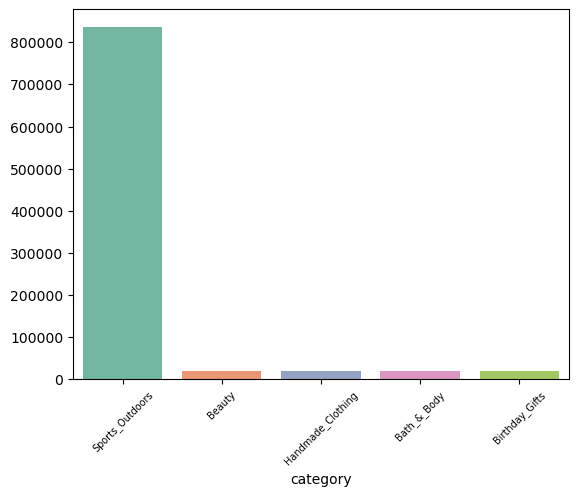

In [14]:
sns.barplot(x=frequency_category.index, y=frequency_category.values,palette='Set2')
plt.xticks([0,1,2,3,4],["Sports_Outdoors","Beauty","Handmade_Clothing","Bath_&_Body","Birthday_Gifts"],rotation=45,fontsize=7)
plt.show()


In [ ]:
df["price"].describe().round(2)
#We have expensive out liers that make our avg price to go up.
#Half of the products cost less than 19.09
#The most common listing price is 9.99
#STD on avg,  products prices differ from  the mean, with extreme variability

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [ ]:
df['price'].var()
#Disperse variance tell us that prices are widely disperse

119445.48532256528

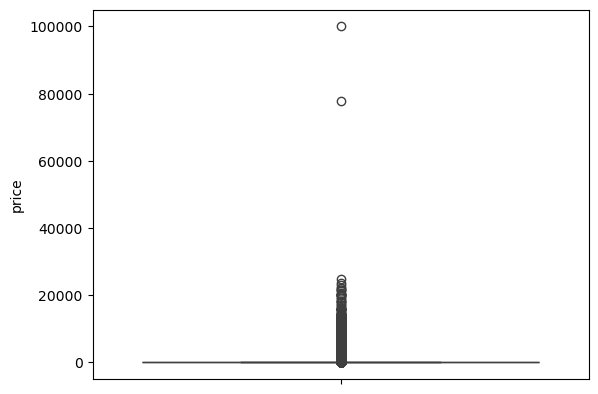

In [ ]:
sns.boxplot(data=df['price'])
plt.show()
#we can see that most of the products are listed at very low prices
# The few listings are priced significally higher, these are the outliers

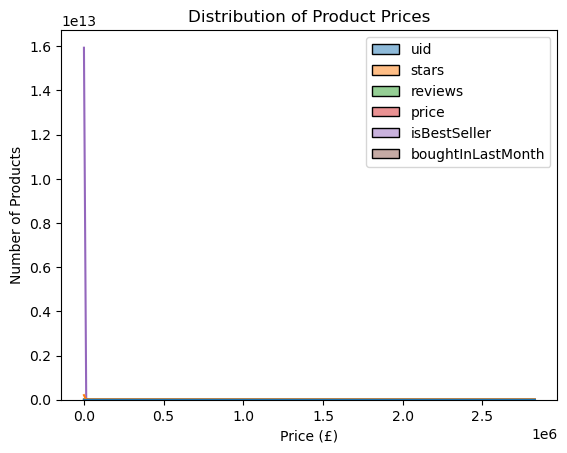

In [ ]:
#i take out the outliers, and limitd the prices below 200 pounds
#most of the products are listed in the lower price range. This indicates that the majority of items sold on Amazon UK are affordable, mass-market products.
sns.histplot(df[df["price"]<200],bins=50,kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price (£)')
plt.ylabel('Number of Products')
plt.show()

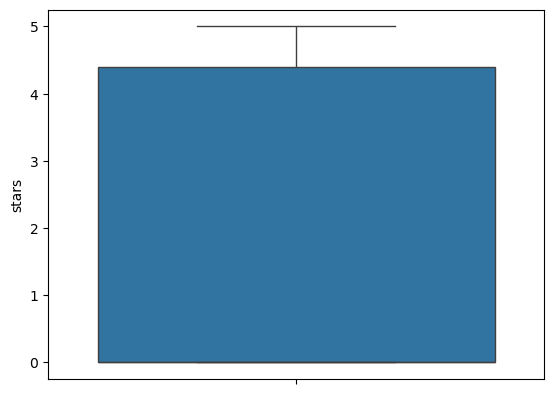

In [32]:
sns.boxplot(data=df['stars'])
plt.show()

In [33]:
df['stars'].var()

4.81743402976196

In [ ]:
df['stars'].describe().round(2)
#On avergae, people rate the products with 0 stars, but when they rate the stars are high with at leat a 4
# The standard deviation (≈2.19) is relatively large given that ratings range only from 0 to 5, meaning customers provide very diverse feedback
# The interquartile range (≈4.4) confirms this: while some products receive no ratings or very low scores, others reach nearly perfect ratings
# Overall, the ratings are not consistent, suggesting that product quality and customer satisfaction differ significantly across listings


count    2443651.00
mean           2.15
std            2.19
min            0.00
25%            0.00
50%            0.00
75%            4.40
max            5.00
Name: stars, dtype: float64

In [ ]:
df['stars'].skew()
#The skewness of product ratings is approximately 0.08, indicating an almost symmetrical distribution
#This suggests that customer ratings are evenly distributed, with no strong tendency toward particularly high or low values

np.float64(0.08120735761080985)

In [ ]:
df['stars'].kurtosis()
#The kurtosis is -1.93 which indicates a platykurtic distribution. The ratings are more evenly spread out than normal distribution

np.float64(-1.9260061280432985)

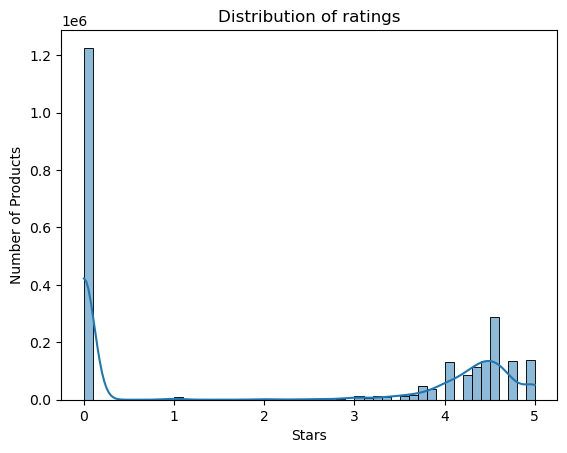

In [ ]:
sns.histplot(df["stars"],bins=50,kde=True)
plt.title('Distribution of ratings')
plt.xlabel('Stars')
plt.ylabel('Number of Products')
plt.show()
#as we saw earlier the most frequent value is 0 stars
#the products that do have ratings, the most common values are 4 and 5 stars, indicating that customer feedback tends to be overwhelmingly positive when reviews are present